#  Projet AARN


## Étape 1 : Préparation des données

### Importation des librairies necessaires au travail et lectures de données

In [1]:

import pandas as pd 
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')


**Organisation du Dataset**

In [2]:
columns = ['target','ids','date','flag','user','text']


df=pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1',names=columns)
df = df[['target','text']]
print(df)




         target                                               text
0             0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1             0  is upset that he can't update his Facebook by ...
2             0  @Kenichan I dived many times for the ball. Man...
3             0    my whole body feels itchy and like its on fire 
4             0  @nationwideclass no, it's not behaving at all....
...         ...                                                ...
1599995       4  Just woke up. Having no school is the best fee...
1599996       4  TheWDB.com - Very cool to hear old Walt interv...
1599997       4  Are you ready for your MoJo Makeover? Ask me f...
1599998       4  Happy 38th Birthday to my boo of alll time!!! ...
1599999       4  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]


## Étape 2 : Nettoyage des tweets :


Fonction de nettoyage :


In [3]:
#Fonction de nettoyage 
def data_processing(text):
    text = text.lower()
    text = re.sub(r"http?\S+|www\S+https?\S+", '',text, flags=re.MULTILINE)
    text=re.sub(r'@\w+\b', '', text)
    text=re.sub(r'#\w+\b', '', text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\b\w\b", "", text) 
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, pos="v") for word in tokens if word not in stop_words]
    return " ".join(tokens)


Test :

In [4]:
#Transformer le dataset en liste.
array = df.to_numpy()
#Appel de la fonction pour le texte à traiter
input_text = array[1599999,1]

processed_data = data_processing(input_text)
print("Avec hashtags  et mentions : \n", )
print(" BEFORE ---------->",input_text)
print(" AFTER   ----------->", processed_data)


#Appel de la fonction pour le texte à traiter
input_text = array[106,1]
print("\n Avec lien  :\n ", )
processed_data = data_processing(input_text)
print(" BEFORE ---------->",input_text)
print(" AFTER   ----------->", processed_data)

Avec hashtags  et mentions : 

 BEFORE ----------> happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H 
 AFTER   -----------> happy

 Avec lien  :
 
 BEFORE ----------> Emily will be glad when Mommy is done training at her new job. She misses her.  http://apps.facebook.com/dogbook/profile/view/6176014
 AFTER   -----------> emily glad mommy do train new job miss


## Étape 3 :  Construction du vocabulaire


Après le prétraitement des tweets, une liste de mots représentera chaque tweet. L'étape suivante consiste à choisir les mots que nous aimerions utiliser dans notre classificateur et que nous voudrions laisser de côté.

La liste complète du vocabulaire devra être sauvegardée dans un fichier, exemple vocab.txt.

Dans cette liste de vocabulaire seulement les mots qui apparaissent au moins K fois dans le corpus de tweets devront être gardés. K devra être choisi empiriquement.
Une fois la liste de vocabulaire obtenu, il faudra mapper chaque mot dans le tweet prétraité à son index dans une liste d'index de mots (qui contient l'index du mot dans la liste de vocabulaire).

Ceci est fait en cherchant le mot dans la liste de vocabulaire et trouver si le mot existe. Si oui, il devra être ajouté dans la variable index des mots. Si le mot n'existe pas, et n'est donc pas dans le vocabulaire,le mot devra être ignoré.

In [5]:
# Sélectionner aléatoirement 50 000 tweets positifs
tweets_positifs = df[df['target'] == 4].sample(n=50000, random_state=42)

# Sélectionner aléatoirement 50 000 tweets négatifs
tweets_negatifs = df[df['target'] == 0].sample(n=50000, random_state=42)

# Concaténer les tweets positifs et négatifs sélectionnés
df_select = pd.concat([tweets_positifs, tweets_negatifs])





test :

In [6]:

df_select['texte_nettoye'] = df_select['text'].apply(data_processing)

df_select

,target,text,texte_nettoye
1012188,4,Is lookin 4ward to a long weekend really dont...,lookin ward long weekend really dont want go w...
1099036,4,#myweakness Is music and i live to meet the p...,music live meet people make
1275978,4,figured out the Internet on my new iPod,figure internet new ipod
1388988,4,@hillsongunited can't wait to worship with you...,cant wait worship guy tonight itll much fun
938859,4,@sillybeggar Congrats James !! I'm sure the bo...,congrats jam im sure book go huge success
...,...,...,...
299543,0,@JenDearness @bjwysoske Not forwarded. I thin...,forward think
746432,0,@sonicphotonic yeah,yeah
256034,0,i'm sooo burnt remind me to take suncream nex...,im sooo burn remind take suncream next time so...
428114,0,@ronskanky I applied weeks ago but didn't hear...,apply weeks ago didnt hear anything


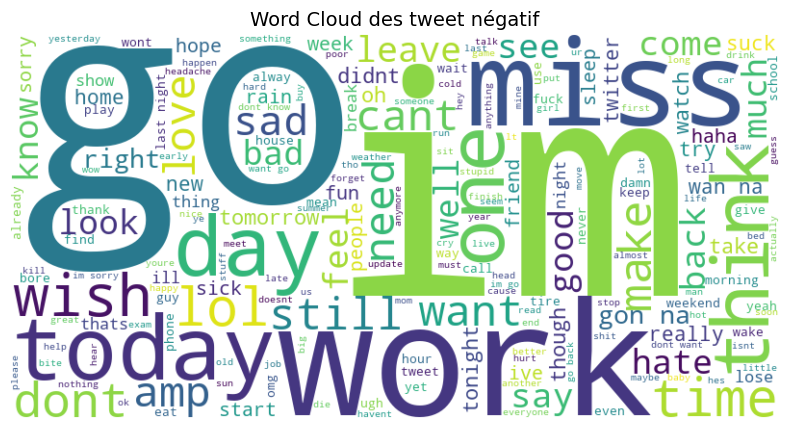

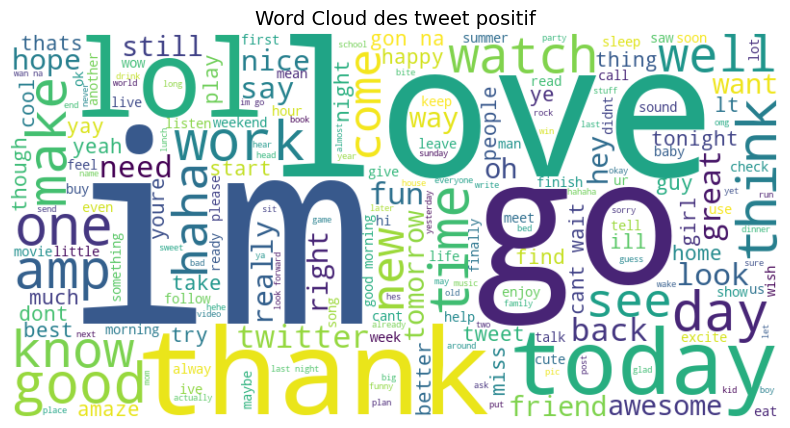

In [7]:
# Fonction pour générer le word cloud
def generer_wordcloud(tweets, titre):
    tout_texte = ' '.join(tweets)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

# Filtrer les tweets négatifs
tweets_negatifs = df_select[df_select['target'] == 0]['texte_nettoye']
generer_wordcloud(tweets_negatifs, 'Word Cloud des tweet négatif')
# Filtrer les tweets positifs
tweets_positifs = df_select[df_select['target'] == 4]['texte_nettoye']
generer_wordcloud(tweets_positifs, 'Word Cloud des tweet positif')

In [8]:
from collections import Counter 
liste = []
for tweet in tweets_positifs:
    split_it = tweet.split()
    liste.extend(split_it)
counter1 = Counter(liste) 
most_occur = counter1.most_common(10) 
print("most common words in positive tweets :")
print(most_occur)

liste2 = []
for tweet in tweets_negatifs:
    split_it2 = tweet.split()
    liste2.extend(split_it2)

Counter2 = Counter(liste2) 
most_occur2 = Counter2.most_common(10) 
print("most common words in positive tweets :")
print(most_occur2)


most common words in positive tweets :
[('get', 5059), ('im', 4754), ('go', 4123), ('good', 3710), ('love', 3341), ('thank', 3114), ('day', 2753), ('like', 2536), ('lol', 2146), ('time', 2114)]
most common words in positive tweets :
[('im', 6340), ('get', 6298), ('go', 5764), ('work', 3656), ('miss', 3004), ('dont', 2907), ('cant', 2783), ('like', 2679), ('want', 2548), ('day', 2459)]


La liste complète du vocabulaire  :

Dans cette liste de vocabulaire seulement les mots qui apparaissent au moins K fois dans le corpus de tweets devront être gardés. K devra être choisi empiriquement.


In [9]:
tweets23  = df_select['texte_nettoye']
tweets23

1012188    lookin ward long weekend really dont want go w...
1099036                          music live meet people make
1275978                             figure internet new ipod
1388988          cant wait worship guy tonight itll much fun
938859             congrats jam im sure book go huge success
                                 ...                        
299543                                         forward think
746432                                                  yeah
256034     im sooo burn remind take suncream next time so...
428114                   apply weeks ago didnt hear anything
491974       phone kill ipod gorgeous smash screen love life
Name: texte_nettoye, Length: 100000, dtype: object

In [10]:
from collections import Counter 
# Créer une liste contenant tous les mots des tweets prétraités
liste2 = []
for tweet in tweets23:
    split_it2 = tweet.split()
    liste2.extend(split_it2)

# Compter la fréquence de chaque mot
Counter2 = Counter(liste2) 

K = 50

# Filtrer les mots pour ne garder que ceux qui apparaissent au moins K fois
vocabulaire = [mot for mot, freq in Counter2.items() if freq >= K]
with open("vocab.txt", "w") as f:
    f.write("\n".join(vocabulaire))
    
# Créer un dictionnaire pour mapper chaque mot à son index dans le vocabulaire
vocab_index = {mot: index for index, mot in enumerate(vocabulaire)}

# Mapper chaque mot dans les tweets prétraités à son index dans le vocabulaire
indexes_tweets = []
for tweet in tweets23:
    indexes = [vocab_index[mot] for mot in tweet.split() if mot in vocab_index]
    indexes_tweets.append(indexes)

# Afficher les 9 mots les plus fréquents dans le corpus de tweets
most_occur2 = Counter2.most_common(9) 
print("Les 9 mots les plus fréquents dans le corpus de tweets :")
print(most_occur2)



Les 9 mots les plus fréquents dans le corpus de tweets :
[('get', 11357), ('im', 11094), ('go', 9887), ('good', 5621), ('work', 5417), ('like', 5215), ('day', 5212), ('love', 4571), ('dont', 4332)]


Test :

In [11]:

print(tweets23.iloc[0])
print(tweets23.iloc[4])
print(indexes_tweets[0])
print(indexes_tweets[4])

lookin ward long weekend really dont want go work day tho
congrats jam im sure book go huge success
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[26, 27, 28, 29, 30, 6, 31]


 Extraction de caractéristiques :

In [12]:
def Extraction_carac(tweet, vocabulaire):
    vecteur = [0] * len(vocabulaire)  
    mots =  tweet.split()
    x=0
    for i in  vocabulaire:
        
        if i in mots :
            vecteur[x] +=1 
        x +=1
    return vecteur

# Exemple d'utilisation
tweet = "congrats jam im sure book go huge success"
tweet1 ="get write mee fun nightt"
tweet2 ="beautiful children smile world smile"
tweet3 ="know im overdo anchorman thing goddamn get one perfect"
tweet4 ="help im get addict twitter work twit time"

print("vocabulaire: ")
print(vocabulaire,"\n \n")


vecteur = Extraction_carac(tweet, vocabulaire)
vecteur1 = Extraction_carac(tweet1, vocabulaire)
vecteur2 = Extraction_carac(tweet2, vocabulaire)
vecteur3 = Extraction_carac(tweet3, vocabulaire)
vecteur4 = Extraction_carac(tweet4, vocabulaire)


print(tweet, ": \n", vecteur)
print(tweet1, ": \n",vecteur1)
print(tweet2, ": \n",vecteur2)
print(tweet3, ": \n",vecteur3)
print(tweet4, ": \n",vecteur4)


vocabulaire: 
['lookin', 'long', 'weekend', 'really', 'dont', 'want', 'go', 'work', 'day', 'tho', 'music', 'live', 'meet', 'people', 'make', 'figure', 'internet', 'new', 'ipod', 'cant', 'wait', 'guy', 'tonight', 'itll', 'much', 'fun', 'congrats', 'jam', 'im', 'sure', 'book', 'huge', 'beautiful', 'children', 'smile', 'world', 'happy', 'birthday', 'yes', 'always', 'ask', 'anything', 'know', 'get', 'write', 'prefer', 'site', 'theres', 'person', 'lol', 'maybe', 'tweet', 'yay', 'return', 'tuesday', 'would', 'fine', 'give', 'away', 'start', 'ice', 'coffee', 'well', 'friday', 'thank', 'pics', 'whole', 'mad', 'late', 'good', 'luck', 'talk', 'mom', 'spend', 'time', 'friends', 'vote', 'hope', 'win', 'great', 'award', 'pray', 'course', 'cover', 'wouldnt', 'annoy', 'wasnt', 'right', 'include', 'far', 'many', 'random', 'update', 'never', 'gon', 'na', 'morning', 'xo', 'guess', 'fair', 'already', 'profile', 'pic', 'fan', 'put', 'skin', 'daughter', 'also', 'lead', 'team', 'love', 'girl', 'night', 'amp

appliquer la fonction d'extraction sur l'ensemble du vocabulaire :

In [13]:
vecteurs_tweets23 = []
for tweet in tweets23:
    vecteur = Extraction_carac(tweet, vocabulaire)
    vecteurs_tweets23.append(vecteur)


afficher le tout :

In [14]:
# for i, (tweet, vecteur) in enumerate(zip(tweets23, vecteurs_tweets23)):
#     print(f"Tweet {i+1}:")
#     print(f"Texte: {tweet}")
#     print(f"Vecteur de caractéristiques: {vecteur}")
#     print("target: ",df_select['target'].iloc[i],"\n")


## Étape 5 :  Classification


Préparation des données d'entrainement et de test

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


X=np.array(vecteurs_tweets23,dtype=np.uint8)
Y= np.array(df_select['target'],dtype=np.uint8)
Y=Y.reshape(len(X),)
    
print("X shape: ",X.shape," Y shape: ",Y.shape)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


X shape:  (100000, 1605)  Y shape:  (100000,)


Regression Logistique

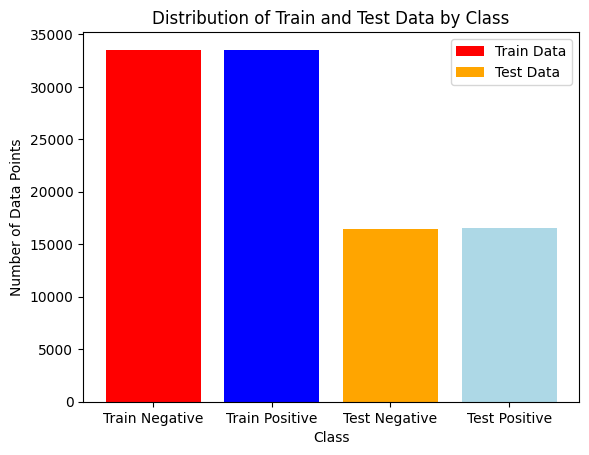

In [26]:
import matplotlib.pyplot as plt

train_counts = np.bincount(y_train.flatten())
test_counts = np.bincount(y_test.flatten())

plt.bar(['Train Negative', 'Train Positive'], [train_counts[0], train_counts[4]], color=['red', 'blue'], label='Train Data')
plt.bar(['Test Negative', 'Test Positive'], [test_counts[0], test_counts[4]], color=['orange', 'lightblue'], label='Test Data')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Train and Test Data by Class')
plt.legend()
plt.show()


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sklearnLogisticRegression = LogisticRegression()
sklearnLogisticRegression.fit(X_train, y_train)

predictions_train = sklearnLogisticRegression.predict(X_train)
predictions_test = sklearnLogisticRegression.predict(X_test)
# performances du model dans la phase train et  test
train_accuracy = accuracy_score(y_train, predictions_train)
train_precision = precision_score(y_train, predictions_train,pos_label=4)
train_recall = recall_score(y_train, predictions_train,pos_label=4)
train_f1 = f1_score(y_train, predictions_train,pos_label=4)

test_accuracy = accuracy_score(y_test, predictions_test)
test_precision = precision_score(y_test, predictions_test,pos_label=4)
test_recall = recall_score(y_test, predictions_test,pos_label=4)
test_f1 = f1_score(y_test, predictions_test,pos_label=4)


performance_table = pd.DataFrame({
    'Performance': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

print(performance_table)




  Performance     Train      Test
0    Accuracy  0.763149  0.753333
1   Precision  0.747309  0.738601
2      Recall  0.794448  0.785775
3    F1 Score  0.770158  0.761458


Réseau de Neurones

In [28]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier()

mlp_classifier.fit(X_train, y_train)

predictions_train_mlp = mlp_classifier.predict(X_train)
predictions_test_mlp = mlp_classifier.predict(X_test)

train_accuracy_mlp = accuracy_score(y_train, predictions_train_mlp)
train_precision_mlp = precision_score(y_train, predictions_train_mlp, pos_label=4)
train_recall_mlp = recall_score(y_train, predictions_train_mlp, pos_label=4)
train_f1_mlp = f1_score(y_train, predictions_train_mlp, pos_label=4)

test_accuracy_mlp = accuracy_score(y_test, predictions_test_mlp)
test_precision_mlp = precision_score(y_test, predictions_test_mlp, pos_label=4)
test_recall_mlp = recall_score(y_test, predictions_test_mlp, pos_label=4)
test_f1_mlp = f1_score(y_test, predictions_test_mlp, pos_label=4)

performance_table_mlp = pd.DataFrame({
    'Performance': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [train_accuracy_mlp, train_precision_mlp, train_recall_mlp, train_f1_mlp],
    'Test': [test_accuracy_mlp, test_precision_mlp, test_recall_mlp, test_f1_mlp]
})

print(performance_table_mlp)


Performances des 2 models

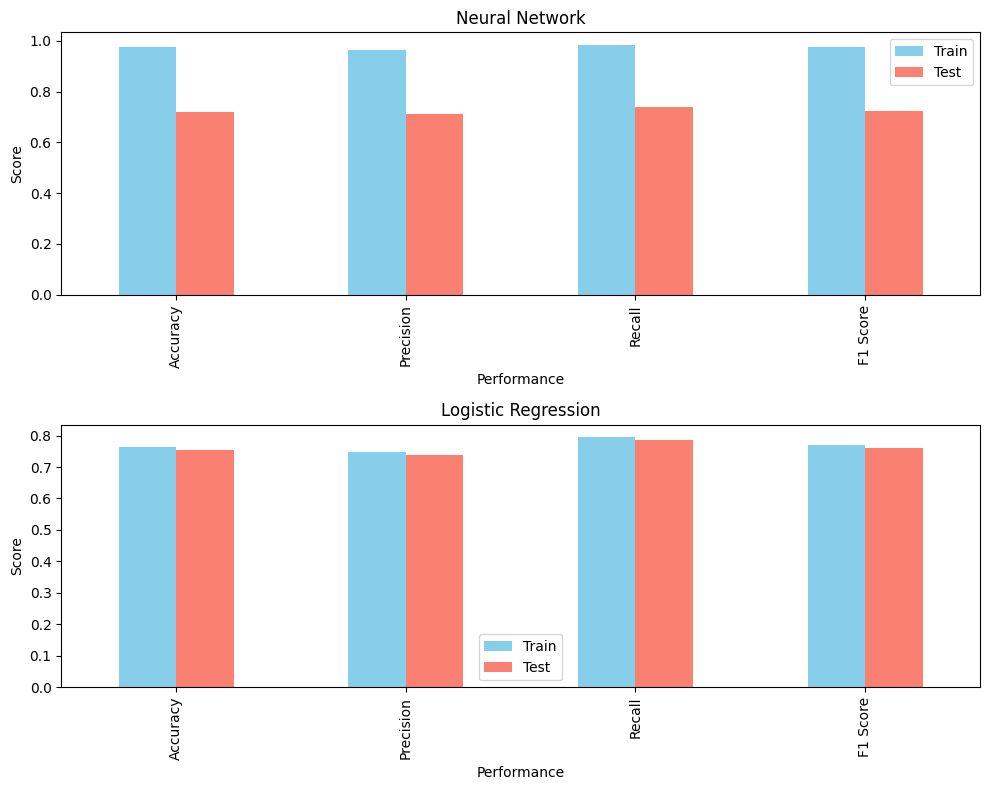

In [19]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, figsize=(10, 8))

performance_table_mlp.plot(kind='bar', x='Performance', ax=axs[0], color=['skyblue', 'salmon'])
axs[0].set_title('Neural Network')
axs[0].set_ylabel('Score')

performance_table.plot(kind='bar', x='Performance', ax=axs[1], color=['skyblue', 'salmon'])
axs[1].set_title('Logistic Regression')
axs[1].set_ylabel('Score')


plt.tight_layout()

# Showing plot
plt.show()


Courbes ROC

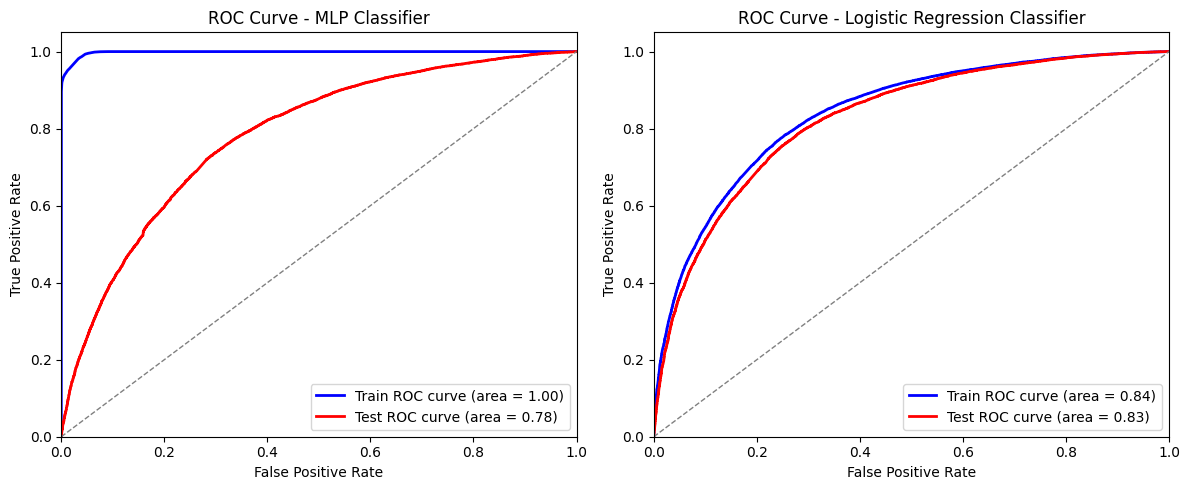

In [20]:
from sklearn.metrics import roc_curve, auc


# MLP Classifier 
train_probabilities_mlp = mlp_classifier.predict_proba(X_train)[:, 1]
test_probabilities_mlp = mlp_classifier.predict_proba(X_test)[:, 1]

train_fpr_mlp, train_tpr_mlp, _ = roc_curve(y_train, train_probabilities_mlp, pos_label=4)
test_fpr_mlp, test_tpr_mlp, _ = roc_curve(y_test, test_probabilities_mlp, pos_label=4)

train_auc_mlp = auc(train_fpr_mlp, train_tpr_mlp)
test_auc_mlp = auc(test_fpr_mlp, test_tpr_mlp)

# Logistic Regression
train_probabilities_lr = sklearnLogisticRegression.predict_proba(X_train)[:, 1]
test_probabilities_lr = sklearnLogisticRegression.predict_proba(X_test)[:, 1]

train_fpr_lr, train_tpr_lr, _ = roc_curve(y_train, train_probabilities_lr, pos_label=4)
test_fpr_lr, test_tpr_lr, _ = roc_curve(y_test, test_probabilities_lr, pos_label=4)

train_auc_lr = auc(train_fpr_lr, train_tpr_lr)
test_auc_lr = auc(test_fpr_lr, test_tpr_lr)

# Courbes ROC
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(train_fpr_mlp, train_tpr_mlp, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc_mlp)
plt.plot(test_fpr_mlp, test_tpr_mlp, color='red', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc_mlp)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP Classifier')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train_fpr_lr, train_tpr_lr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc_lr)
plt.plot(test_fpr_lr, test_tpr_lr, color='red', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc_lr)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Classifier')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


KNN

In [21]:
def KNN(X_train,Y_train,X_target,K):
 
    distances=[]
    # calcule de dist entre les attributs de l'instance et chaque ligne de X_train  
    for x in range(len(X_train)):
        dist= np.sqrt(sum((np.array(X_train[x,:])-np.array(X_target))**2))
        distances.append(dist)
    
    distances=np.array(distances)

   
    # argsort retourne les indices des k premiers elements sans trier reelement le tableau
    k_nearest=np.argsort(distances)[:K]
    # les classes des k voisins
    k_nearest_y=Y_train[k_nearest]
    print(K," nearest neighbors:")
    print(k_nearest_y.flatten())

    # choisir la classe qui a les plus d'occurences
    counts = Counter(tuple(label) for label in k_nearest_y)
    predicted_y = counts.most_common(1)[0][0]

    return predicted_y



Tests

In [22]:
# classify a tweet from the dataset or directly from input
def classify_tweet(model,tweet):
    if isinstance(tweet,int):
        raw_tweet=df['text'].iloc[tweet]
        target=df['target'].iloc[tweet]
    
    if isinstance(tweet,str):
        raw_tweet=tweet
        target=None
    tweet_class = "Positive "if target==4 else "Negative "
    print("raw tweet: ",raw_tweet)
    clean_tweet=data_processing(raw_tweet)
    print("clean tweet: ",clean_tweet)
    tweet_features=Extraction_carac(clean_tweet,vocabulaire)
    sum=0
    for i in range(len(vocabulaire)):
        sum+=tweet_features[i]
    print("number of the tweet's words in the vocabulary: ",sum)
    tweet_features=np.array(tweet_features).reshape(1,len(vocabulaire))

    prediction=model.predict(tweet_features)
    pred = "Positive " if prediction==4 else "Negative "
    if target is None:
        
        print("prediction: this is a ",pred,"tweet",prediction)
    else :
        print("prediction: this is a ",pred,"tweet",prediction," |target: ",tweet_class,"[",target,"] ")

# prendre un tweet aleatoirement du dataset
tweet_id=np.random.randint(0,len(df))
print("tweet n° ",tweet_id)

print("*****logistic regrssion*****")
# tweet du dataset
classify_tweet(sklearnLogisticRegression,tweet_id)
print("\n")
# un tweet ecris par l'utilisateur
classify_tweet(sklearnLogisticRegression,"i really had a bad day at work today #worksucks ")
print("\n")

print("*****neural network*****")
# tweet du dataset
classify_tweet(mlp_classifier,tweet_id)
print("\n")
# un tweet ecris par l'utilisateur
classify_tweet(mlp_classifier,"i really had a bad day at work today #worksucks ")
print("\n")

print("*****KNN*****")
k=9
# get the tweet features
test_tweet=Extraction_carac(data_processing(df['text'].iloc[tweet_id]),vocabulaire)
pred=KNN(X_train,y_train,test_tweet,k)
print("predicted: ",pred[0]," target: ",y_test[0],"the prediction is: ",pred[0]==y_test[0])



tweet n°  189793
*****logistic regrssion*****
raw tweet:  Slept funny so back hurts, don't want to get up for work 
clean tweet:  sleep funny back hurt dont want get work
number of the tweet's words in the vocabulary:  8
prediction: this is a  Negative  tweet [0]  |target:  Negative  [ 0 ] 


raw tweet:  i really had a bad day at work today #worksucks 
clean tweet:  really bad day work today
number of the tweet's words in the vocabulary:  5
prediction: this is a  Negative  tweet [0]


*****neural network*****
raw tweet:  Slept funny so back hurts, don't want to get up for work 
clean tweet:  sleep funny back hurt dont want get work
number of the tweet's words in the vocabulary:  8
prediction: this is a  Negative  tweet [0]  |target:  Negative  [ 0 ] 


raw tweet:  i really had a bad day at work today #worksucks 
clean tweet:  really bad day work today
number of the tweet's words in the vocabulary:  5
prediction: this is a  Negative  tweet [0]


*****KNN*****
9  nearest neighbors:
[4 0 